# Cleaning and Analyzing Employee Exit Surveys

Feedback from employee exit surveys can provide powerful insight into a company’s culture. It doesn't matter how excellent a company is, people are eventually going to leave. Exit surveys allows leaving employees to share their unique opinions. This can help companies in mitigating the many costs of losing other employees in the future.

![](https://images.squarespace-cdn.com/content/v1/5dd58dee80e8fe0621b369a3/1630337526747-0Y46T61FP1AFLQ9X9A77/Employee+Exiting+An+Organization?format=1000w)

Image source: [Skywalk Group](https://skywalkgroup.com/blog/post/the-importance-of-exit-interviews)

## Project and Data Overview
In this Project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

The DETE exit survey data can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). However, the original TAFE exit survey data is no longer available. Some modifications have been made to the original datasets to make them easier to work with, especially changing the encoding from cp1252 to UTF-8.

## Business Problem
We will play the role of data analyst and pretend our stakeholders want to know the following:
- Is some dissatisfaction causing newer and older employees to resign from the institute?
- If a dissatisfaction is present, how does vary within the different age groups at the instititute? 
- Are females more likely to resign than males?

The stakeholders want us to combine the results from both surveys and answer these questions. Although both surveys used the same template, one of them had customized answers. 

## Data Dictionary
A data dictionary wasn't provided with the dataset. In a job setting, we'd **make sure** to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

From *`dete_survey.csv`*, we will focus on the following columns:
- `ID`: An id used to identify the participant of the survey.
- `SeparationType`: The reason why the person's employment ended.
- `Cease Date`: The year or month the person's employment ended.
- `DETE Start Date`: The year the person began employment with the DETE.

From *`tafe_survey.csv`*, we will focus on the following columns:
- `Record ID`: An id used to identify the participant of the survey.
- `Reason for ceasing employment`: The reason why the person's employment ended.
- `LengthofServiceOverall`. Overall Length of Service at Institute (in years): The length of the person's employment (in years).

## Useful Libraries

In [1]:
from datetime import datetime
from tabulate import tabulate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

## Exploring the DETE Dataset

In [2]:
#read the dete dataset
dete_survey = pd.read_csv('./dete_survey.csv')

# Ensure that all columns are printed in our output
pd.set_option("display.max_columns", None)

# preview dataset info
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### Initial Notes
- The dataset comprises 822 rows and 56 columns
- The column names do not conform to the recommended python snake case convention. Infact, the naming convention here appears inconsistent.
- 32 of the 56 columns in the dataset contain missing data. Columns like `Classification`, `Business Unit`, `Aboriginal`, `Torres Strait`, `South Sea`, `Disability` and `NESB` have over 50% missing data. 
- 18 of the 56 columns are stored as boolean data types. Only the `ID` column is stored as an integer type. Other columns are stored as object/string data.
- Time data (`Cease Date`, `DETE Start Date` and `Role Start Date`) are stored as object/string data instead of integer or datetime data.

In [3]:
dete_survey.describe(include='all')

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,822,822,822,817,455,822,126,817,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,808,735,816,788,817,815,810,813,812,813,811,767,746,792,768,814,812,816,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,25,51,46,15,8,9,14,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,73,98,324,161,135,54,434,800,742,788,733,761,806,765,794,795,788,760,754,785,710,794,605,735,605,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Additional Notes

- The most frequent reason for employee exit from DETE is *age retirement*. Majority of the employees did not leave due to *Job disatisfaction* (the most frequent response in this column is 'False').
- *'61 or older'* is the most common age group for respondents. This may further support age retirement as the most common reason for exit.
- Most of the entries for `Start Date` and `Role Start Date` were recorded as *'Not Stated'*. There could be a chance that this information wasn't available to respondents at the time of completing the survey.
- The last five columns, `Aboriginal`, `Torres Strait`, `South Sea`, `Disability` and `NESB` have only one unique value which is **'Yes'**. This might explain why they have the highest proportion of null values. Null entries in these columns might have stood for **'No'** at the time the survey was administered.
- The most common entry from the Professional Development column to the Health & Safety column is 'A'. This seems quite unusual as 'A' doesn't seem to represent anything. We will explore these columns further.

We will define a function `count_values()` which computes the counts of all the unique values in a series. Next, we will apply the function to an extracted dataframe using the `.apply()` method:

In [4]:
def count_values(series):
    return series.value_counts()

# extract the columns from Professional Development to Health and Safety.
flagged_columns = dete_survey.iloc[:, 28:49]

# use the apply method to compute the count of unique values in the flagged columns
flagged_columns.apply(count_values)

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety
A,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386
D,60,83,112,77,61,107,95,77,37,34,59,65,108,78,77,76,52,45,60,105,50
M,15,24,13,14,15,12,14,12,11,13,11,22,17,15,13,8,10,11,10,33,28
N,103,230,158,160,99,116,168,120,95,95,94,141,183,138,179,129,116,120,130,225,153
SA,184,100,121,115,148,162,124,179,243,244,228,157,130,156,149,144,177,165,162,78,141
SD,33,56,77,65,27,59,67,76,25,31,47,37,62,57,57,58,57,39,50,72,35


From Professional Development to Health & Safety, there are 6 unique values: `A`, `D`, `M`,`N`, `SA`, `SD`.

These may be aliases for the infamous survey options: **Strongly Agree (SA), Moderately agree (M), Agree (A), Neutral (N), Disagree (D) and Strongly Disagree (SD)**. Of these options, Agree (A) seems to be the most commonly selected option.

## Exploring the TAFE Dataset

In [5]:
tafe_survey = pd.read_csv('./tafe_survey.csv')

# preview dataset info
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

### Notes
- The column names in the TAFE survey are wordy, which makes them hard to work with. They do not follow the python snake case convention.
- The dataset comprises 702 rows and 72 columns.
- Missing values comprise 62% of the entries in the 'Contributing Factors' columns
- 70 of the 72 columns are stored as object/string data. Only the `Record ID` and `CESSATION YEAR` columns are stored as float types.
- Although they bear different names, most of the columns are similar to the DETE dataset. Examples include the `CESSATION YEAR`, `Reason for ceasing employment`, `Gender`, `CurrentAge`, `EmploymentType` and many others.

In [6]:
tafe_survey.describe(include='all')

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

### Additional Notes from the TAFE survey
- Some Contributing factors are recorded as "-". This might be a placeholder indicating that no answer was provided at the time ths survey was administered.
- *Institute* and *WorkUnit* related questions have six unique values namely: **Agree, Neutral, Strongly Agree, Disagree, Strongly Disagree and Not Applicable**. Similar to the DETE survey, the most common entry in each of these columns is **'Agree'**.
- The column `Main Factor. Which of these was the main factor for leaving?` shows that the most frequent reason for employee exit is dissatisfaction. In addition this column has over 80% missing entries.
- The CurrentAge column is contains several age bins. The most common age group are respondents older than 56 years.

**Both the `dete_survey` and `tafe_survey` datasets contain many columns that we wont be needing to answer our stakeholder questions**.

## Initial Conclusions
1.  The `dete_survey` data contains 'Not Stated' values that indicate values are missing, they should be represented as NaN
2. There are many columns we wont be needing for our analysis.
3. Both surveys contain many similar columns, but the names are different.
4. In the `tafe_survey` there are responses that point to resignation caused by dissatisfaction.

Let's address the first two issues. We can use the `pd.read_csv()` method to specify values that should be represented as NaN:
- We'll use this function to fix the missing values in the `dete_survey`. 
- Then, we'll drop columns that we don't need for our analysis. This includes columns that do not imply that an employee resigned due to dissatisfaction, columns that do not add relevant data to our analysis, and columns with too many missing entries.

## Data Cleaning

## Defaulting 'Not Stated' to NaN

In [7]:
dete_survey = pd.read_csv('./dete_survey.csv', na_values='Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


## Removing Unwanted Columns

For DETE, we'll drop the object columns from `Professional Development [28]` to `Health & Safety [48]`. These were the columns with the infamous **Agree, Neutral, Strongly Agree, Disagree, Strongly Disagree and Not Applicable** options.

In [8]:
# Verify and print out the unwanted columns
unwanted_dete = dete_survey.columns[28:49]

print('\033[1m' + '\033[4m' +  '\033[95m' + 'Unwanted Columns in DETE Survey' + '\033[0m')
print(unwanted_dete)

Unwanted Columns in DETE Survey
Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')


In [9]:
dete_survey.drop(unwanted_dete, axis=1, inplace=True)
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN


We will repeat the same process for TAFE, dropping columns containing similar survey data from `Main Factor [17]` to `Workplace Topic [65]`.

In [10]:
unwanted_tafe = tafe_survey.columns[17:66]

tafe_survey.drop(unwanted_tafe, axis=1, inplace=True)
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print('\033[1m' + '\033[4m' + 'REMAINING COLUMNS' + '\033[0m')
print('\033[1m' + '\033[95m' + 'DETE: {} columns'.format(dete_survey.shape[1]) + '\033[0m')
print('\033[1m' + '\033[94m' + 'TAFE: {} columns'.format(tafe_survey.shape[1]) + '\033[0m')

REMAINING COLUMNS
DETE: 35 columns
TAFE: 23 columns


## Cleaning Column Names
As observed earlier, both datasets contains many of the same columns, but the column names are different. Here are some columns we'd like to use for our final analysis as seen from both datasets:

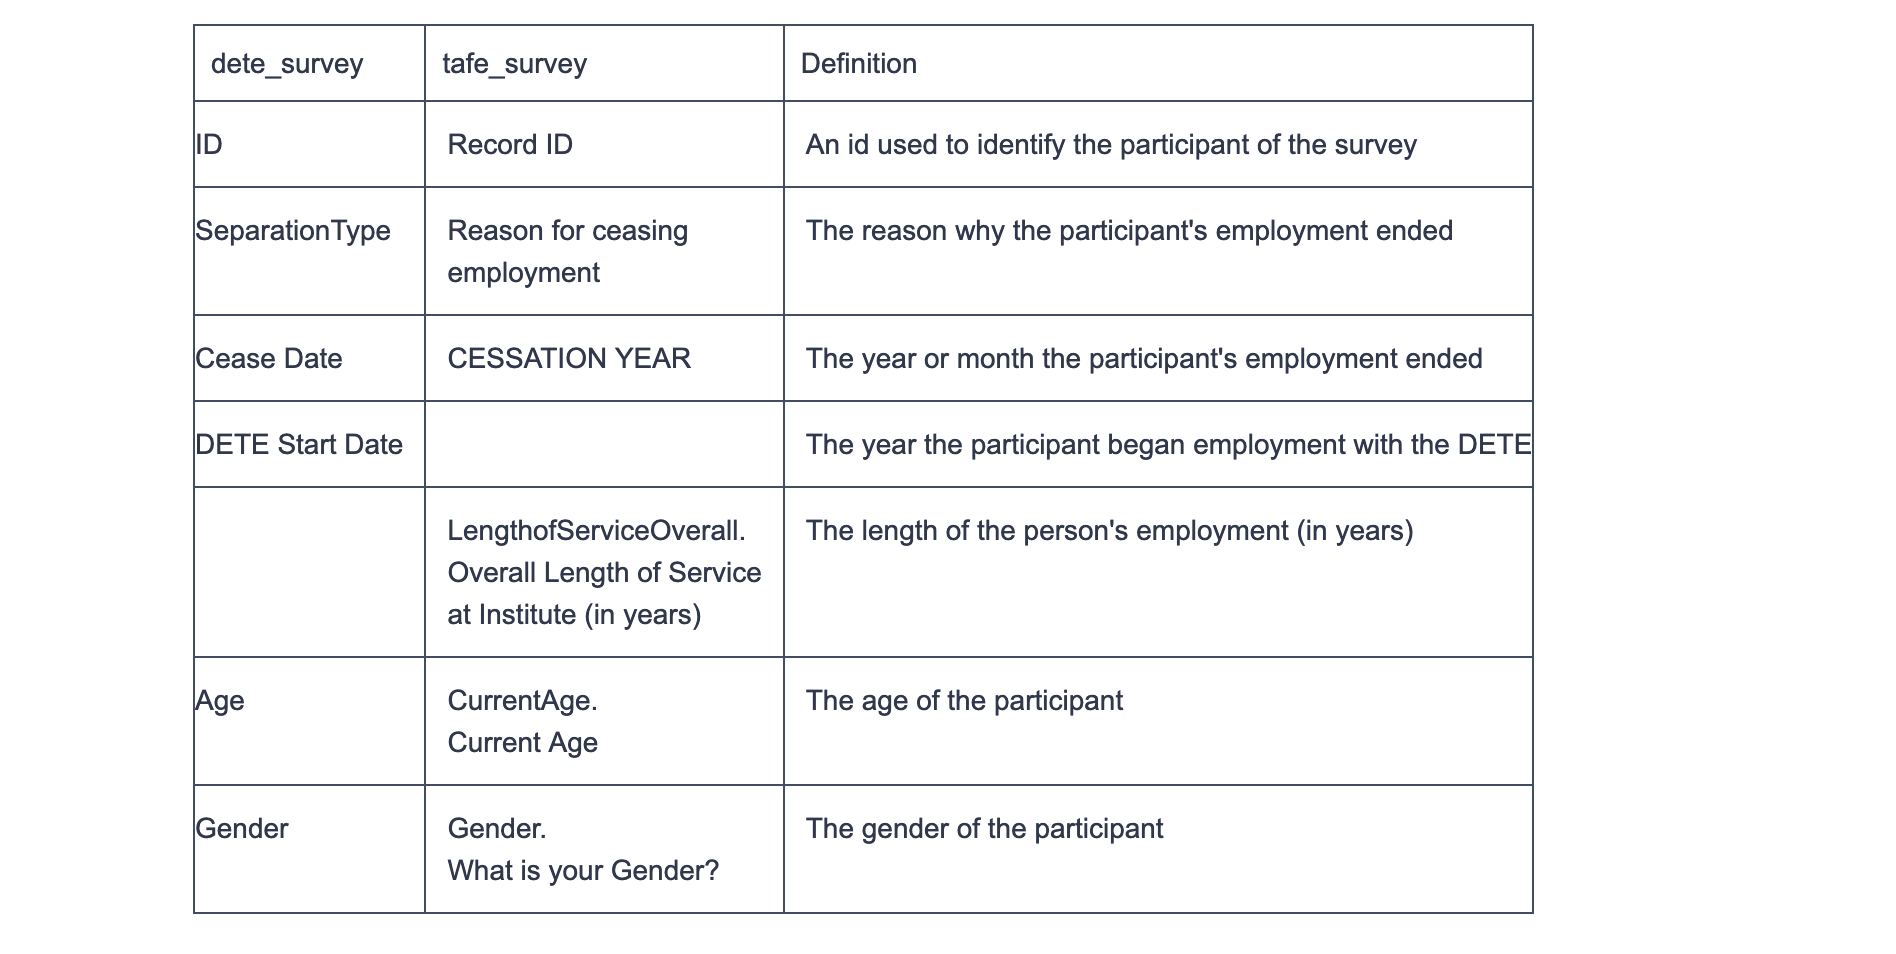
The plan is to end up combining the two datasets. To do this, we will have to standardize the column names.

In [12]:
dete_survey.columns = (dete_survey.columns.str.lower()
                           .str.replace('separationtype', 'separation_type')
                           .str.replace(' ', '_')
                           .str.replace('/', '_')
                           .str.strip()
                      )

print('\033[1m' + '\033[4m' +  '\033[95m' + 'Renamed DETE Columns' + '\033[0m')
print(dete_survey.columns)

Renamed DETE Columns
Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


Next, we will use the `DataFrame.rename()` method to update the columns in `tafe_survey`. We will focus on the similar columns for now, then handle the other columns later:

In [13]:
similar_columns = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separation_type',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_survey.rename(similar_columns, axis=1, inplace=True)

print('\033[1m' + '\033[4m' +  '\033[94m' + 'Renamed TAFE Columns' + '\033[0m')
print(tafe_survey.columns)

Renamed TAFE Columns
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


## Filtering the Data
Our end goal is to answer the following question:

```
Is some dissatisfaction causing newer and older employees to resign from the institute?
```

If we look at the unique values in the `separation_type` columns in each dataframe, we'll see that each contains a couple of different separation types:

In [14]:
names = ['DETE SURVEY DATA', 'TAFE SURVEY DATA']
colors = ['\033[95m','\033[94m']

for df, name, color in zip([dete_survey, tafe_survey], names,  colors):
    print('\033[1m' + '\033[4m' +  color + name + '\033[0m')
    print(tabulate(df['separation_type'].value_counts(dropna=False).to_frame(), 
                   headers=['Separation Type', 'Count'], tablefmt='psql'))
    print('')

DETE SURVEY DATA
+--------------------------------------+---------+
| Separation Type                      |   Count |
|--------------------------------------+---------|
| Age Retirement                       |     285 |
| Resignation-Other reasons            |     150 |
| Resignation-Other employer           |      91 |
| Resignation-Move overseas/interstate |      70 |
| Voluntary Early Retirement (VER)     |      67 |
| Ill Health Retirement                |      61 |
| Other                                |      49 |
| Contract Expired                     |      34 |
| Termination                          |      15 |
+--------------------------------------+---------+

TAFE SURVEY DATA
+--------------------------+---------+
| Separation Type          |   Count |
|--------------------------+---------|
| Resignation              |     340 |
| Contract Expired         |     127 |
| Retrenchment/ Redundancy |     104 |
| Retirement               |      82 |
| Transfer                 | 

Ww will only analyze survey respondents who resigned, their separation type contains the string 'Resignation'. In both datasets, we can see multiple uses of the word 'Resignation' in different seperation types:
- Resignation
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

We have to account for each of these variations so we don't unintentionally drop useful data.

In [15]:
# .copy was added to deal with settings with copy warnings.
dete_resignations = dete_survey[dete_survey['separation_type'].str.startswith('Resignation')].copy()
tafe_resignations = tafe_survey[tafe_survey['separation_type'].str.startswith('Resignation', na=False)].copy()

for df, name, color in zip([dete_resignations, tafe_resignations], names,  colors):
    print('\033[1m' + '\033[4m' +  color + name + '\033[0m')
    print(tabulate(df['separation_type'].value_counts(dropna=False).to_frame(), 
                   headers=['Separation Type', 'Count'], tablefmt='psql'))
    print('')

DETE SURVEY DATA
+--------------------------------------+---------+
| Separation Type                      |   Count |
|--------------------------------------+---------|
| Resignation-Other reasons            |     150 |
| Resignation-Other employer           |      91 |
| Resignation-Move overseas/interstate |      70 |
+--------------------------------------+---------+

TAFE SURVEY DATA
+-------------------+---------+
| Separation Type   |   Count |
|-------------------+---------|
| Resignation       |     340 |
+-------------------+---------+



## Verifying the Dates

In this step, we'll focus on verifying that the years in the `cease_date`, `dete_start_date` and `role_start_date` columns make sense. 
- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in the education field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

Lets start by taking a look at the `cease_date` column in the DETE dataset:

In [16]:
def pretty_print(data, headings, color, title):
    print('\033[1m' + '\033[4m' +  color + title + '\033[0m')
    print(tabulate(data.to_frame(), headers=headings, tablefmt='pretty', stralign='left'))

pretty_print(dete_resignations['cease_date'].value_counts(),
             ['cease_date', 'Count'], colors[0], 
             'Cease Dates in DETE Resignation Data')

Cease Dates in DETE Resignation Data
+------------+-------+
| cease_date | Count |
+------------+-------+
| 2012       | 126   |
| 2013       | 74    |
| 01/2014    | 22    |
| 12/2013    | 17    |
| 06/2013    | 14    |
| 09/2013    | 11    |
| 07/2013    | 9     |
| 11/2013    | 9     |
| 10/2013    | 6     |
| 08/2013    | 4     |
| 05/2012    | 2     |
| 05/2013    | 2     |
| 07/2012    | 1     |
| 2010       | 1     |
| 09/2010    | 1     |
| 07/2006    | 1     |
+------------+-------+


The dates appear not to follow the same pattern. Some dates are entered as years, while some are recorded in the MM/YYYY format. To avoid further issues down the line, we will clean this column, extract only the year values and convert the datatype to float. 

In [17]:
year_pattern = r"([0-9]{4})"

dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(year_pattern)
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

pretty_print(dete_resignations['cease_date'].value_counts().sort_index(),
             ['Cease_date', 'Count'], colors[0], 
             'Cease Dates in DETE Resignation Data - after cleaning')

print('Datatype: {}'.format(dete_resignations['cease_date'].dtype))

Cease Dates in DETE Resignation Data - after cleaning
+------------+-------+
| Cease_date | Count |
+------------+-------+
| 2006.0     | 1     |
| 2010.0     | 2     |
| 2012.0     | 129   |
| 2013.0     | 146   |
| 2014.0     | 22    |
+------------+-------+
Datatype: float64


Next we will explore the `cease_date` column of TAFE resignation data.

In [18]:
pretty_print(tafe_resignations['cease_date'].value_counts().sort_index(),
             ['cease_date', 'Count'], colors[1], 
             'Cease Dates in TAFE Resignation Data')

print('Datatype: {}'.format(tafe_resignations['cease_date'].dtype))

Cease Dates in TAFE Resignation Data
+------------+-------+
| cease_date | Count |
+------------+-------+
| 2009.0     | 2     |
| 2010.0     | 68    |
| 2011.0     | 116   |
| 2012.0     | 94    |
| 2013.0     | 55    |
+------------+-------+
Datatype: float64


The TAFE cease dates look fine. Let's dive in to explore the `dete_start_date` column of the DETE resignation data.

In [19]:
pretty_print(dete_resignations['dete_start_date'].value_counts().sort_index(),
             ['Start Date', 'Count'], colors[0], 
             'Start Dates in DETE Resignation Data')

print('Datatype: {}'.format(dete_resignations['dete_start_date'].dtype))

Start Dates in DETE Resignation Data
+------------+-------+
| Start Date | Count |
+------------+-------+
| 1963.0     | 1     |
| 1971.0     | 1     |
| 1972.0     | 1     |
| 1973.0     | 1     |
| 1974.0     | 2     |
| 1975.0     | 1     |
| 1976.0     | 2     |
| 1977.0     | 1     |
| 1980.0     | 5     |
| 1982.0     | 1     |
| 1983.0     | 2     |
| 1984.0     | 1     |
| 1985.0     | 3     |
| 1986.0     | 3     |
| 1987.0     | 1     |
| 1988.0     | 4     |
| 1989.0     | 4     |
| 1990.0     | 5     |
| 1991.0     | 4     |
| 1992.0     | 6     |
| 1993.0     | 5     |
| 1994.0     | 6     |
| 1995.0     | 4     |
| 1996.0     | 6     |
| 1997.0     | 5     |
| 1998.0     | 6     |
| 1999.0     | 8     |
| 2000.0     | 9     |
| 2001.0     | 3     |
| 2002.0     | 6     |
| 2003.0     | 6     |
| 2004.0     | 14    |
| 2005.0     | 15    |
| 2006.0     | 13    |
| 2007.0     | 21    |
| 2008.0     | 22    |
| 2009.0     | 13    |
| 2010.0     | 17    |
| 2011.0     | 24   

Again, the dates seem realistic and the datatype is stored as float. Nothing to do here. Let's explore the `role_start_date` column of the DETE resignation data.

In [20]:
pretty_print(dete_resignations['role_start_date'].value_counts().sort_index(),
             ['Role Start Date', 'Count'], colors[0], 
             'Role Start Dates in DETE Resignation Data')

print('Datatype: {}'.format(dete_resignations['role_start_date'].dtype))

Role Start Dates in DETE Resignation Data
+-----------------+-------+
| Role Start Date | Count |
+-----------------+-------+
| 200.0           | 1     |
| 1976.0          | 2     |
| 1980.0          | 1     |
| 1982.0          | 1     |
| 1986.0          | 1     |
| 1987.0          | 2     |
| 1988.0          | 3     |
| 1989.0          | 5     |
| 1990.0          | 1     |
| 1991.0          | 1     |
| 1992.0          | 4     |
| 1993.0          | 3     |
| 1994.0          | 2     |
| 1996.0          | 3     |
| 1997.0          | 5     |
| 1998.0          | 4     |
| 1999.0          | 6     |
| 2000.0          | 1     |
| 2001.0          | 2     |
| 2002.0          | 7     |
| 2003.0          | 6     |
| 2004.0          | 10    |
| 2005.0          | 9     |
| 2006.0          | 7     |
| 2007.0          | 24    |
| 2008.0          | 21    |
| 2009.0          | 18    |
| 2010.0          | 27    |
| 2011.0          | 33    |
| 2012.0          | 37    |
| 2013.0          | 24    |
+-----

One entry in this column seems unusual. The role start date is 200. This could have occurred due an error at the time of completing the survey. Since there is only one entry with this error, we can safely remove the record from our dataset:

In [21]:
dete_resignations = dete_resignations.query('role_start_date != 200')

pretty_print(dete_resignations['role_start_date'].value_counts().sort_index(),
             ['Role Start Date', 'Count'], colors[0], 
             'Role Start Dates in DETE Resignation Data - After cleaning')

Role Start Dates in DETE Resignation Data - After cleaning
+-----------------+-------+
| Role Start Date | Count |
+-----------------+-------+
| 1976.0          | 2     |
| 1980.0          | 1     |
| 1982.0          | 1     |
| 1986.0          | 1     |
| 1987.0          | 2     |
| 1988.0          | 3     |
| 1989.0          | 5     |
| 1990.0          | 1     |
| 1991.0          | 1     |
| 1992.0          | 4     |
| 1993.0          | 3     |
| 1994.0          | 2     |
| 1996.0          | 3     |
| 1997.0          | 5     |
| 1998.0          | 4     |
| 1999.0          | 6     |
| 2000.0          | 1     |
| 2001.0          | 2     |
| 2002.0          | 7     |
| 2003.0          | 6     |
| 2004.0          | 10    |
| 2005.0          | 9     |
| 2006.0          | 7     |
| 2007.0          | 24    |
| 2008.0          | 21    |
| 2009.0          | 18    |
| 2010.0          | 27    |
| 2011.0          | 33    |
| 2012.0          | 37    |
| 2013.0          | 24    |
+----------------

## Visualizing the Date Columns

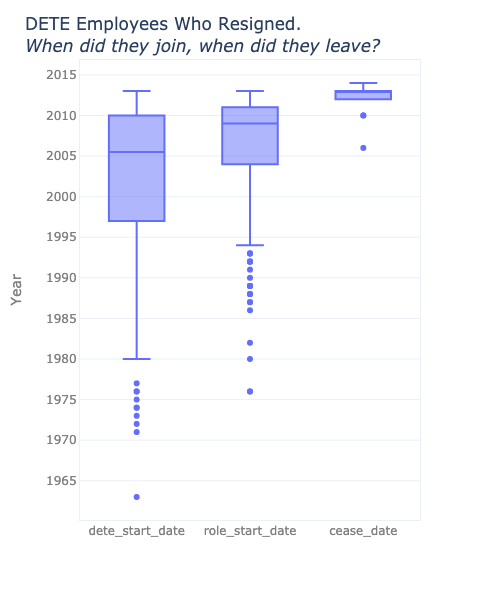

In [22]:
dete_dates = dete_resignations[['dete_start_date', 'role_start_date', 'cease_date']]

fig = px.box(dete_dates, y=dete_dates.columns, width=500, height=600, template='plotly_white')
fig.update_layout(title='DETE Employees Who Resigned.<br><i>When did they join, when did they leave?')
fig.update_yaxes(dtick=5, color='gray', title='Year', showline=True, mirror=True)
fig.update_xaxes(title='', color='gray', showline=True, mirror=True)

fig.show('png')

### Observations
- Majority of the employees who resigned had joined DETE between the year 1997 and 2010. Between year 2010 and 2014, over 50% of these employees resigned from the institution.

Since we do not have detailed information on the job start dates from the TAFE resignation data. We will not build a similar visualization for the TAFE survey.

## Estimating Years of Service
Now that we've verified the different date data from the two datasets. We can safely use them to calculate the length of time that each survey respondent (employee) spent in the respective workplaces.

The `tafe_resignations` dataframe already contains an *`institute_service`* column. However, the `dete_resignations` do not contain such information at the moment. Luckily we can extrapolate this from the *`dete_start_date`* and *`cease_date`* columns. This will prove useful in the long run, when we have to analyze both surveys together.

In [23]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

pretty_print(dete_resignations['institute_service'].value_counts(bins=5),
             ['Institute service', 'Count'], colors[0], 
             'Institute Service Years in DETE Resignation Data')


Institute Service Years in DETE Resignation Data
+-------------------+-------+
| Institute service | Count |
+-------------------+-------+
| (-0.05, 9.8]      | 167   |
| (9.8, 19.6]       | 55    |
| (19.6, 29.4]      | 32    |
| (29.4, 39.2]      | 15    |
| (39.2, 49.0]      | 3     |
+-------------------+-------+


### Observations
- 167 employees (about 54%) who resigned from DETE had not worked up to 10 years. The remaining 46% had worked the 10 year mark at DETE.

Let's explore the institute service pattern at TAFE:

In [24]:
pretty_print(tafe_resignations['institute_service'].value_counts(dropna=False),
             ['Institute service', 'Count'], colors[1], 
             'Institute Service Years in TAFE Resignation Data')

Institute Service Years in TAFE Resignation Data
+--------------------+-------+
| Institute service  | Count |
+--------------------+-------+
| Less than 1 year   | 73    |
| 1-2                | 64    |
| 3-4                | 63    |
| nan                | 50    |
| 5-6                | 33    |
| 11-20              | 26    |
| 7-10               | 21    |
| More than 20 years | 10    |
+--------------------+-------+


### Observations
- Although we have 50 missing institute service entries, we can see a more exaggerated pattern in the TAFE data. A whooping 80% of employees who resigned did not work up to 10 years at TAFE. Only 20% of resigning employees had worked over 10 years.

## Identifying Dissatisfied Employees

Now, we will try to identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to make this assessment:

TAFE

- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`

DETE

- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

If an employee indicated that any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. 

After our changes, the new *`dissatisfied`* column will contain just the following values:

- `True:` indicates a person resigned because they were dissatisfied with the job
- `False:` indicates a person resigned because of a reason other than dissatisfaction with the job
- `NaN:` indicates the value is missing


In [25]:
dissatisfied_dete = [
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]

dissatisfied_tafe = [
    'Contributing Factors. Dissatisfaction',
    'Contributing Factors. Job Dissatisfaction'
]

for column in dissatisfied_dete:
    pretty_print(dete_resignations[column].value_counts(dropna=False),
             ['Unique Values', 'Count'], colors[0], 
             'DETE DATA: '+ column)

DETE DATA: job_dissatisfaction
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 269   |
| True          | 41    |
+---------------+-------+
DETE DATA: dissatisfaction_with_the_department
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 281   |
| True          | 29    |
+---------------+-------+
DETE DATA: physical_work_environment
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 304   |
| True          | 6     |
+---------------+-------+
DETE DATA: lack_of_recognition
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 277   |
| True          | 33    |
+---------------+-------+
DETE DATA: lack_of_job_security
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 296   |
| True          | 14    |
+---------------+-------+
DETE DATA: work_location
+---------------+

We won't need further cleaning on these DETE resignation columns. They all appear to be in the right format. Lets also explore the TAFE columns we are interested in:

In [26]:
for column in dissatisfied_tafe:
    pretty_print(tafe_resignations[column].value_counts(dropna=False),
             ['Unique Values', 'Count'], colors[0], 
             'TAFE DATA: '+ column)

TAFE DATA: Contributing Factors. Dissatisfaction
+---------------------------------------+-------+
| Unique Values                         | Count |
+---------------------------------------+-------+
| -                                     | 277   |
| Contributing Factors. Dissatisfaction | 55    |
| nan                                   | 8     |
+---------------------------------------+-------+
TAFE DATA: Contributing Factors. Job Dissatisfaction
+---------------------+-------+
| Unique Values       | Count |
+---------------------+-------+
| -                   | 270   |
| Job Dissatisfaction | 62    |
| nan                 | 8     |
+---------------------+-------+


We will need to manually update `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` in the TAFE dataset to True, False or NaN values:

In [27]:
def map_boolean(entry):
    if entry == '-':
        return False
    elif pd.isnull(entry):
        return np.nan
    else:
        return True
    
for column in dissatisfied_tafe:
    tafe_resignations[column] = tafe_resignations[column].map(map_boolean)
    pretty_print(tafe_resignations[column].value_counts(dropna=False),
             ['Unique Values', 'Count'], colors[0], 
             'TAFE DATA: '+ column)

TAFE DATA: Contributing Factors. Dissatisfaction
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 277   |
| True          | 55    |
| nan           | 8     |
+---------------+-------+
TAFE DATA: Contributing Factors. Job Dissatisfaction
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 270   |
| True          | 62    |
| nan           | 8     |
+---------------+-------+


We can now update our findings in all these columns and represent it as a single boolean expression in a new `dissatisfied` column:

In [28]:
tafe_resignations['dissatisfied'] = tafe_resignations[dissatisfied_tafe].any(axis=1, skipna=False)
dete_resignations['dissatisfied'] = dete_resignations[dissatisfied_dete].any(axis=1, skipna=False)

for df, name, color in zip([dete_resignations, tafe_resignations], ['DETE', 'TAFE'], [0,1]):
    pretty_print(df['dissatisfied'].value_counts(dropna=False),
             ['Unique Values', 'Count'], colors[color], 
            name+': Unique Values in the Dissatisfied Column')

DETE: Unique Values in the Dissatisfied Column
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 161   |
| True          | 149   |
+---------------+-------+
TAFE: Unique Values in the Dissatisfied Column
+---------------+-------+
| Unique Values | Count |
+---------------+-------+
| False         | 241   |
| True          | 99    |
+---------------+-------+
